# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
y = y.reshape(len(y),1) #reshape y to be vertically (2-D array) bec the class we'll be using to train requires a 2-D array

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

Here we require to do Feature Scaling manually here because there are no Coefficients like in previous Regression model to take care of the scaling

You do not have to apply feature scaling on dummy variables as the have values in 0 and 1 only. also not have to apply feature scaling to features having value between 0 and 1 only.

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #create an object for X, Apply feature scaling for y bec the values are far apart
sc_y = StandardScaler() #create an object foy y, Apply feature scaling for y bec the values are far apart
# two different StandardScaler objects have been created because fit_transform calculates the mean and uses that to scale and the mean of both X and y features are different
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

Here, we also do not split the data into train and test sets as we require the maximum data to learn the relation between the level and the salary

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #recommended kernel for SVF 
regressor.fit(X, y)

/Users/jeeveshdhingra/ML/env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [12]:
# Predicting a new result
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
# Invert y_pred result
y_pred = np.array(y_pred).reshape((len(y_pred), 1))
y_pred = sc_y.inverse_transform(y_pred)


In [13]:
y_pred

array([[170370.0204065]])

## Visualising the SVR results

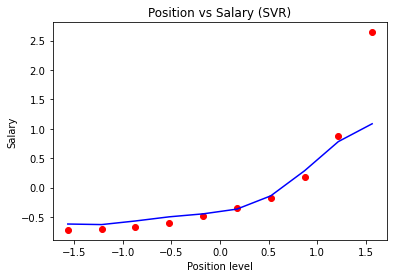

In [14]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Position vs Salary (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

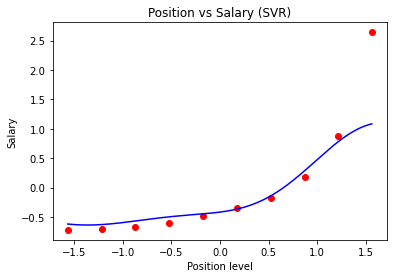

In [15]:
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Position vs Salary (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2_score(y, regressor.predict(X))

0.7516001070620798